In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# import dataset
df = pd.read_csv(r'For_modeling.csv', index_col=0)

In [18]:
# drop NA values
df.dropna(axis=0,how='any',inplace=True)

In [19]:
# drop duplicate values
df.drop_duplicates(inplace=True)

In [20]:
# remove outliers

import numpy as np
from scipy import stats


In [21]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [22]:
# Rename latitude and longitude features
df.rename({'PLong': 'Pickup_longitude', 'PLatd': 'Pickup_latitude', 'DLong': 'Dropoff_longitude', 'DLatd': 'Dropoff_latitude'}, axis=1, inplace=True)
# Rename pickup time features
df.rename({'PMonth': 'Pickup_month', 'Pday': 'Pickup_day', 'Phour': 'Pickup_hour', 'Pmin': 'Pickup_minute'},axis=1,inplace=True)
# Rename dropoff time features
df.rename({'Dmonth': 'Dropoff_month', 'Dday': 'Dropoff_day', 'Dhour': 'Dropoff_hour', 'Dmin': 'Dropoff_minute'},axis=1,inplace=True)
# Rename "day of week" features
df.rename({'PDweek': 'Pickup_weekday', 'DDweek': 'Dropoff_weekday'},axis=1,inplace=True)

In [23]:
# rename for my own sake
df.columns

Index(['Duration', 'Distance', 'Pickup_longitude', 'Pickup_latitude',
       'Dropoff_longitude', 'Dropoff_latitude', 'Haversine', 'Pmonth',
       'Pickup_day', 'Pickup_hour', 'Pickup_minute', 'Pickup_weekday',
       'Dropoff_month', 'Dropoff_day', 'Dropoff_hour', 'Dropoff_minute',
       'Dropoff_weekday', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

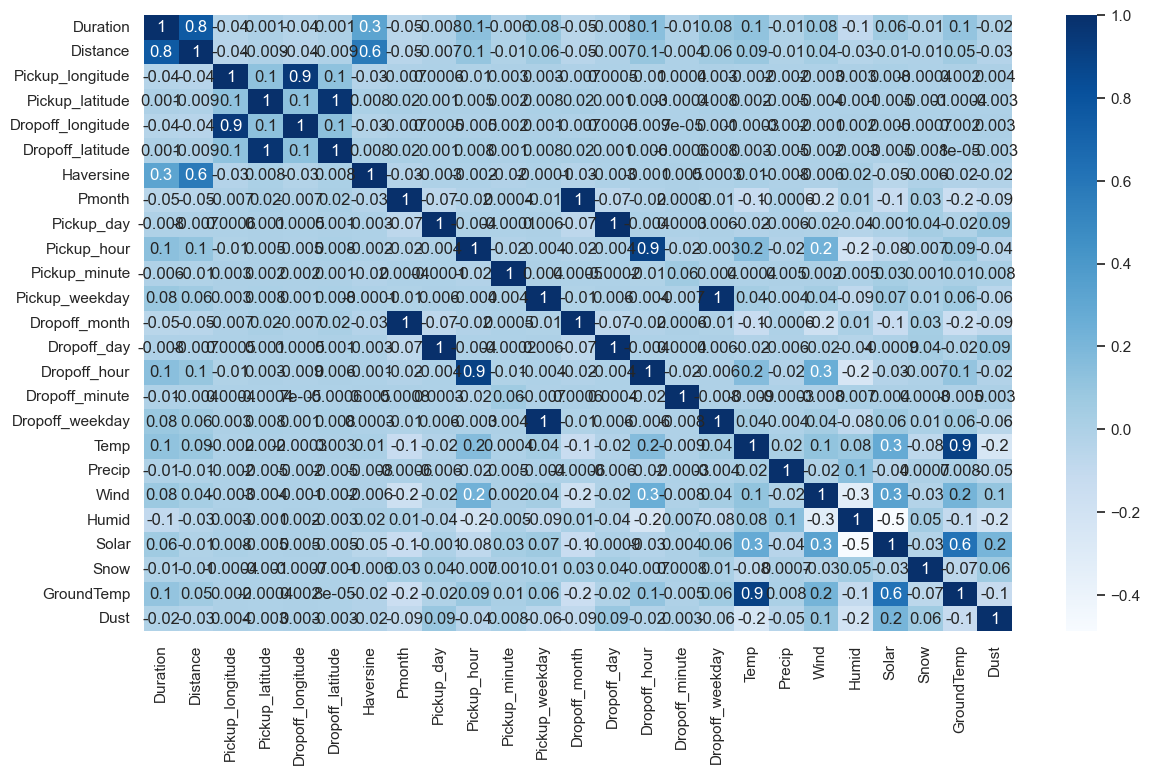

In [24]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [25]:
df.drop(['GroundTemp', 'Dropoff_latitude', 'Dropoff_longitude', 'Dropoff_month', 'Dropoff_day', 'Dropoff_weekday'],axis='columns',inplace=True)

In [26]:
# save to csv
df.to_csv('cleaned_data_simplified.csv')